# We will see about langGraph
- What langGraph is?
- Why we use langGraph framework?
- How we use langGraph?

## What LangGraph is?
LangGraph is a library for building stateful, multi-actor applications with LLMs, used to create agent and multi-agent workflows.

### Key Features:

- **Cycles and Branching:** Implement loops and conditionals in your apps.
  - **Loops:** Imagine a chatbot that needs to ask the user a series of questions to gather information. LangGraph can create a loop that repeatedly asks questions until the user provides all the necessary data.
  - **Conditionals:** If you're building a decision-making application, LangGraph can implement conditional statements to choose different paths based on specific criteria. For example, a customer support bot might offer different options based on the user's issue.

- **Persistence:** Automatically save state after each step in the graph. Pause and resume the graph execution at any point to support error recovery, human-in-the-loop workflows, time travel and more.
  - **State Saving:** LangGraph can automatically save the current state of your application after each step, ensuring that you can resume the workflow from where you left off if there's an interruption.
  - **Pause and Resume:** If an error occurs or you need to review the workflow, you can pause the execution and resume it later. This feature is especially useful for human-in-the-loop workflows where a human needs to intervene.

- **Human-in-the-Loop:** Interrupt graph execution to approve or edit next action planned by the agent.
  - **Manual Intervention:** LangGraph allows you to pause the execution of the workflow and manually review or edit the next planned action. This is helpful for tasks that require human judgment or oversight.

- **Streaming Support:** Stream outputs as they are produced by each node (including token streaming).
  - **Real-time Outputs:** LangGraph can stream outputs as they are produced by each node, enabling real-time updates and progress tracking. This is particularly useful for applications that generate text or other data in a continuous stream.

Integration with LangChain: LangGraph integrates seamlessly with LangChain and LangSmith (but does not require them).

## Example:
**A Simple Chatbot**

Imagine a chatbot that helps users find restaurants. It might follow this workflow:

1. Greet the user: Welcome message.
2. Ask for cuisine: Prompt the user to choose a cuisine.
3. Ask for location: Prompt the user to specify a location.
4. Search for restaurants: Use a tool to search for restaurants based on the user's preferences.
5. Display results: Show the search results to the user.

LangGraph could be used to create this workflow, with nodes representing each step and edges representing the transitions between them. Conditional edges could be used to handle different user responses, while persistence could be used to save the user's preferences for future interactions.`

# Workflow Of Chatbot:
![Chatbot Node Example](https://github.com/Wania-Kazmi/LangGraph_Lectures/blob/main/Assets/langgraph_example_1.png?raw=1)


# What is State, Node, Edges in LangGraph?
- **State:** States define the different stages or points in the application's lifecycle. They can hold data, variables, or other information that influences the application's behavior.
  - **State in Above Example:**
    - **Start:** This is the initial state of the workflow, where the application begins execution.
    - **End:** This is the final state of the workflow, indicating its completion.

- **Node:** Nodes provide a clear structure and visualization of the workflow. They help in understanding the different steps or stages an application can go through.
  - **Node in Above Example:**
    - Chatbot: The central node representing the chatbot's interaction with the user.

- **Edges:** Edges define the flow of execution in the application. They determine how the application moves from one state to another based on specific criteria or events. They can be unconditional (always leading to the next node) or conditional (leading to different nodes based on certain conditions).
  - **Edges in Above Example:**
    - **Start -> Chatbot:** The edge connecting the initial state to the chatbot node, indicating the workflow's progression.
    - **Chatbot -> End:** The edge connecting the chatbot node to the final state, representing the completion of the interaction.

In [2]:
# langgraph is a Python library used for building and managing conversational AI models. It helps in designing and orchestrating multi-step workflows or flows for chatbots
!pip install -q -U langgraph


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.4/404.4 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.0/378.0 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.2 MB/s eta 0:00:00


In [3]:
!pip install -q langchain langchain_groq langchain_community langchain_core

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 1.4 MB/s eta 0:00:00


In [4]:
from google.colab import userdata
groq_key = userdata.get("GROQ_API_KEY") # This command is used to retrieve the GROQ API key
# key is likely needed for accessing Groq service via an api in your google colab environment.
#  key is used for authentication to access the Groq API

In [5]:
from langchain_groq import ChatGroq
llm = ChatGroq(groq_api_key=groq_key, model_name =  "Llama3-8b-8192")

## State


In [6]:
# How we defne a state in a code
from typing_extensions import TypedDict
class MessageState(TypedDict):
    graph_state: str
# represent the current state of the conversation graph, indicating which nodes or paths are active.

## Construct Graph

In [7]:
# With StateGraph, you can define nodes (states) and edges (transitions) in a way that allows for structured flow control within your application.
from langgraph.graph import StateGraph, START, END
# Buil Graph
builder = StateGraph(MessageState)
builder


## Node

In [8]:
def chatbot(state: MessageState):
    # Whenever we create any node in this graph builder,
    # we have to pass MessageState in it because based on state message,
    # the state management will keep on changing.
  return {"graph_state": llm.invoke(state["graph_state"])}
#                 node name  function name
builder.add_node("chatbot", chatbot)
# The line builder.add_node("chatbot", chatbot) adds the chatbot function as a node in the StateGraph you are building.

## Edge

In [9]:
from langgraph.graph import START, END
builder.add_edge(START, "chatbot")
builder.add_edge("chatbot", END)

## Compile the graph

In [10]:
graph = builder.compile()

## View Graph

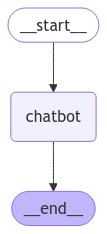

In [11]:
from IPython.display import Image
# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [13]:
# test our agent
from langchain_core.messages import AIMessage, HumanMessage
result = graph.invoke({"graph_state": [HumanMessage(content="Hi, this is Math Class. What is 10x2?")]})
result['graph_state'].content

"Hi there!\n\nAh, easy peasy!\n\n10 x 2 = 20\n\nHow's that?"

In [14]:
# test our agent
from langchain_core.messages import AIMessage, HumanMessage
result = graph.invoke({"graph_state": [HumanMessage(content="Hi, tell me basics about quantum physics?")]})
result['graph_state'].content

'A fascinating topic! Quantum physics, also known as quantum mechanics, is a branch of physics that deals with the behavior of matter and energy at an atomic and subatomic level. Here are the basics:\n\n**1. Wave-Particle Duality**: Quantum objects (such as electrons, photons, and atoms) can exhibit both wave-like and particle-like behavior depending on how they\'re observed. This is a fundamental concept that challenges our classical understanding of reality.\n\n**2. Uncertainty Principle**: It\'s impossible to know certain properties of a quantum object, such as its position and momentum, simultaneously with infinite precision. The more precisely you measure one property, the less precisely you can know the other.\n\n**3. Superposition**: Quantum objects can exist in multiple states simultaneously, which is known as a superposition of states. This means that, for example, an electron can be in two or more energy states at the same time.\n\n**4. Entanglement**: When two or more quantu

## Conditional Edges:
Now we know that edges can be conditional and unconditional we have already seen unconditional edge. Now check the Conditional Edge example:

# The Simplest Graph

Let's build a simple graph with 3 nodes and one conditional edge.

![Screenshot 2024-08-20 at 3.11.22 PM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dba5f465f6e9a2482ad935_simple-graph1.png)

## State

First, define the [State](https://langchain-ai.github.io/langgraph/concepts/low_level/#state) of the graph.

The State schema serves as the input schema for all Nodes and Edges in the graph.

Let's use the `TypedDict` class from python's `typing` module as our schema, which provides type hints for the keys.

In [15]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_state: str

## Nodes

[Nodes](https://langchain-ai.github.io/langgraph/concepts/low_level/#nodes) are just python functions.

The first positional argument is the state, as defined above.

Because the state is a `TypedDict` with schema as defined above, each node can access the key, `graph_state`, with `state['graph_state']`.

Each node returns a new value of the state key `graph_state`.
  
By default, the new value returned by each node [will override](https://langchain-ai.github.io/langgraph/concepts/low_level/#reducers) the prior state value.

In [17]:
def node_1(state):
    print("---Node 1---")
    return {"graph_state": state['graph_state'] +" I am"}

def node_2(state):
    print("---Node 2---")
    return {"graph_state": state['graph_state'] +" happy!"}

def node_3(state):
    print("---Node 3---")
    return {"graph_state": state['graph_state'] +" sad!"}

## Edges

[Edges](https://langchain-ai.github.io/langgraph/concepts/low_level/#edges) connect the nodes.

Normal Edges are used if you want to *always* go from, for example, `node_1` to `node_2`.

[Conditional Edges](https://langchain-ai.github.io/langgraph/reference/graphs/?h=conditional+edge#langgraph.graph.StateGraph.add_conditional_edges) are used want to *optionally* route between nodes.

Conditional edges are implemented as functions that return the next node to visit based upon some logic.

In [19]:
import random
from typing import Literal

def decide_mood(state) -> Literal["node_2", "node_3"]:

    # Often, we will use state to decide on the next node to visit
    user_input = state['graph_state']

    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:

        # 50% of the time, we return Node 2
        return "node_2"

    # 50% of the time, we return Node 3
    return "node_3"

## Graph Construction

Now, we build the graph from our [components](
https://langchain-ai.github.io/langgraph/concepts/low_level/) defined above.

The [StateGraph class](https://langchain-ai.github.io/langgraph/concepts/low_level/#stategraph) is the graph class that we can use.

First, we initialize a StateGraph with the `State` class we defined above.

Then, we add our nodes and edges.

We use the [`START` Node, a special node](https://langchain-ai.github.io/langgraph/concepts/low_level/#start-node) that sends user input to the graph, to indicate where to start our graph.

The [`END` Node](https://langchain-ai.github.io/langgraph/concepts/low_level/#end-node) is a special node that represents a terminal node.

Finally, we [compile our graph](https://langchain-ai.github.io/langgraph/concepts/low_level/#compiling-your-graph) to perform a few basic checks on the graph structure.

We can visualize the graph as a [Mermaid diagram](https://github.com/mermaid-js/mermaid).

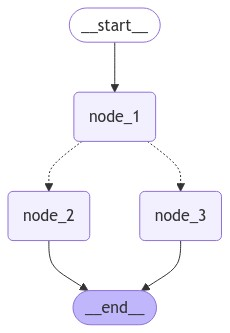

In [20]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

## Graph Invocation

The compiled graph implements the [runnable](https://python.langchain.com/v0.1/docs/expression_language/interface/) protocol.

This provides a standard way to execute LangChain components.

`invoke` is one of the standard methods in this interface.

The input is a dictionary `{"graph_state": "Hi, this is lance."}`, which sets the initial value for our graph state dict.

When `invoke` is called, the graph starts execution from the `START` node.

It progresses through the defined nodes (`node_1`, `node_2`, `node_3`) in order.

The conditional edge will traverse from node `1` to node `2` or `3` using a 50/50 decision rule.

Each node function receives the current state and returns a new value, which overrides the graph state.

The execution continues until it reaches the `END` node.

In [21]:
graph.invoke({"graph_state" : "Hi, this is Lance."})

---Node 1---
---Node 3---


{'graph_state': 'Hi, this is Lance. I am sad!'}

`invoke` runs the entire graph synchronously.

This waits for each step to complete before moving to the next.

It returns the final state of the graph after all nodes have executed.

In this case, it returns the state after `node_3` has completed:

```
{'graph_state': 'Hi, this is Lance. I am sad!'}
```